In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
true_b, true_w = 1, 2
N = 100

np.random.seed(42)
x = np.random.rand(N, 1)
y = true_b + true_w * x + (0.1 * np.random.randn(N,1))

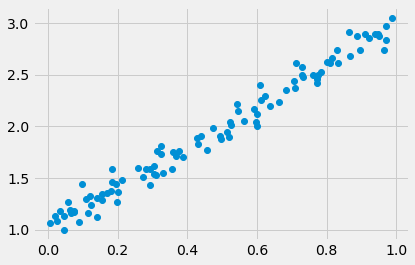

In [4]:
plt.plot(x, y, 'o')